In [1]:
import pandas as pd
import requests
from io import StringIO

github="https://raw.githubusercontent.com/agronomy4future/raw_data_practice/main/grain_yield_map.csv"
response=requests.get(github)
df=pd.read_csv(StringIO(response.text))

df.head(5)

,Latitude,Longitude,GY
0,12.15725,-106.14035,16.248
1,12.15724,-106.13994,26.703
2,12.15724,-106.13954,16.569
3,12.15723,-106.13911,21.451
4,12.15722,-106.13871,19.107


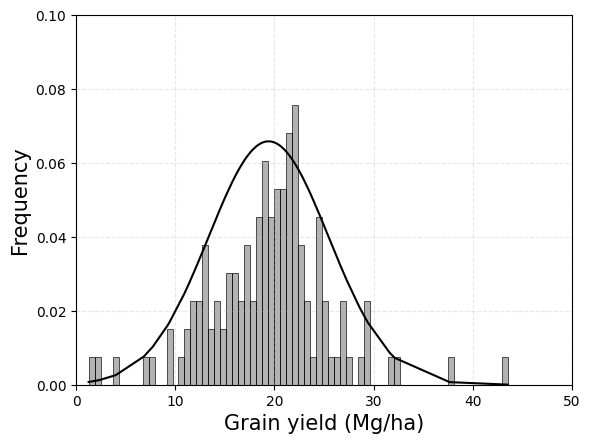

In [2]:
# to open library
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

# to calculate mean and standard deviation
df_mean= np.mean(df["GY"])
df_std= np.std(df["GY"])

# to calculate probability density function
df_pdf= stats.norm.pdf(df["GY"].sort_values(), df_mean, df_std)

# to draw normal distribution (with histogram) gragh
plt.plot(df["GY"].sort_values(), df_pdf, color= "Black")
sns.histplot(data= df["GY"], color= "Black", bins= 70, stat= "probability", alpha= 0.3)

plt.xlim([0,50])
plt.ylim([0,0.1])
plt.xlabel("Grain yield (Mg/ha)", size= 15)
plt.ylabel("Frequency", size= 15)
plt.grid(True, alpha=0.3, linestyle="--")
plt.rcParams["figure.figsize"]= [7,5]
plt.rcParams["figure.dpi"]= 500
plt.show()

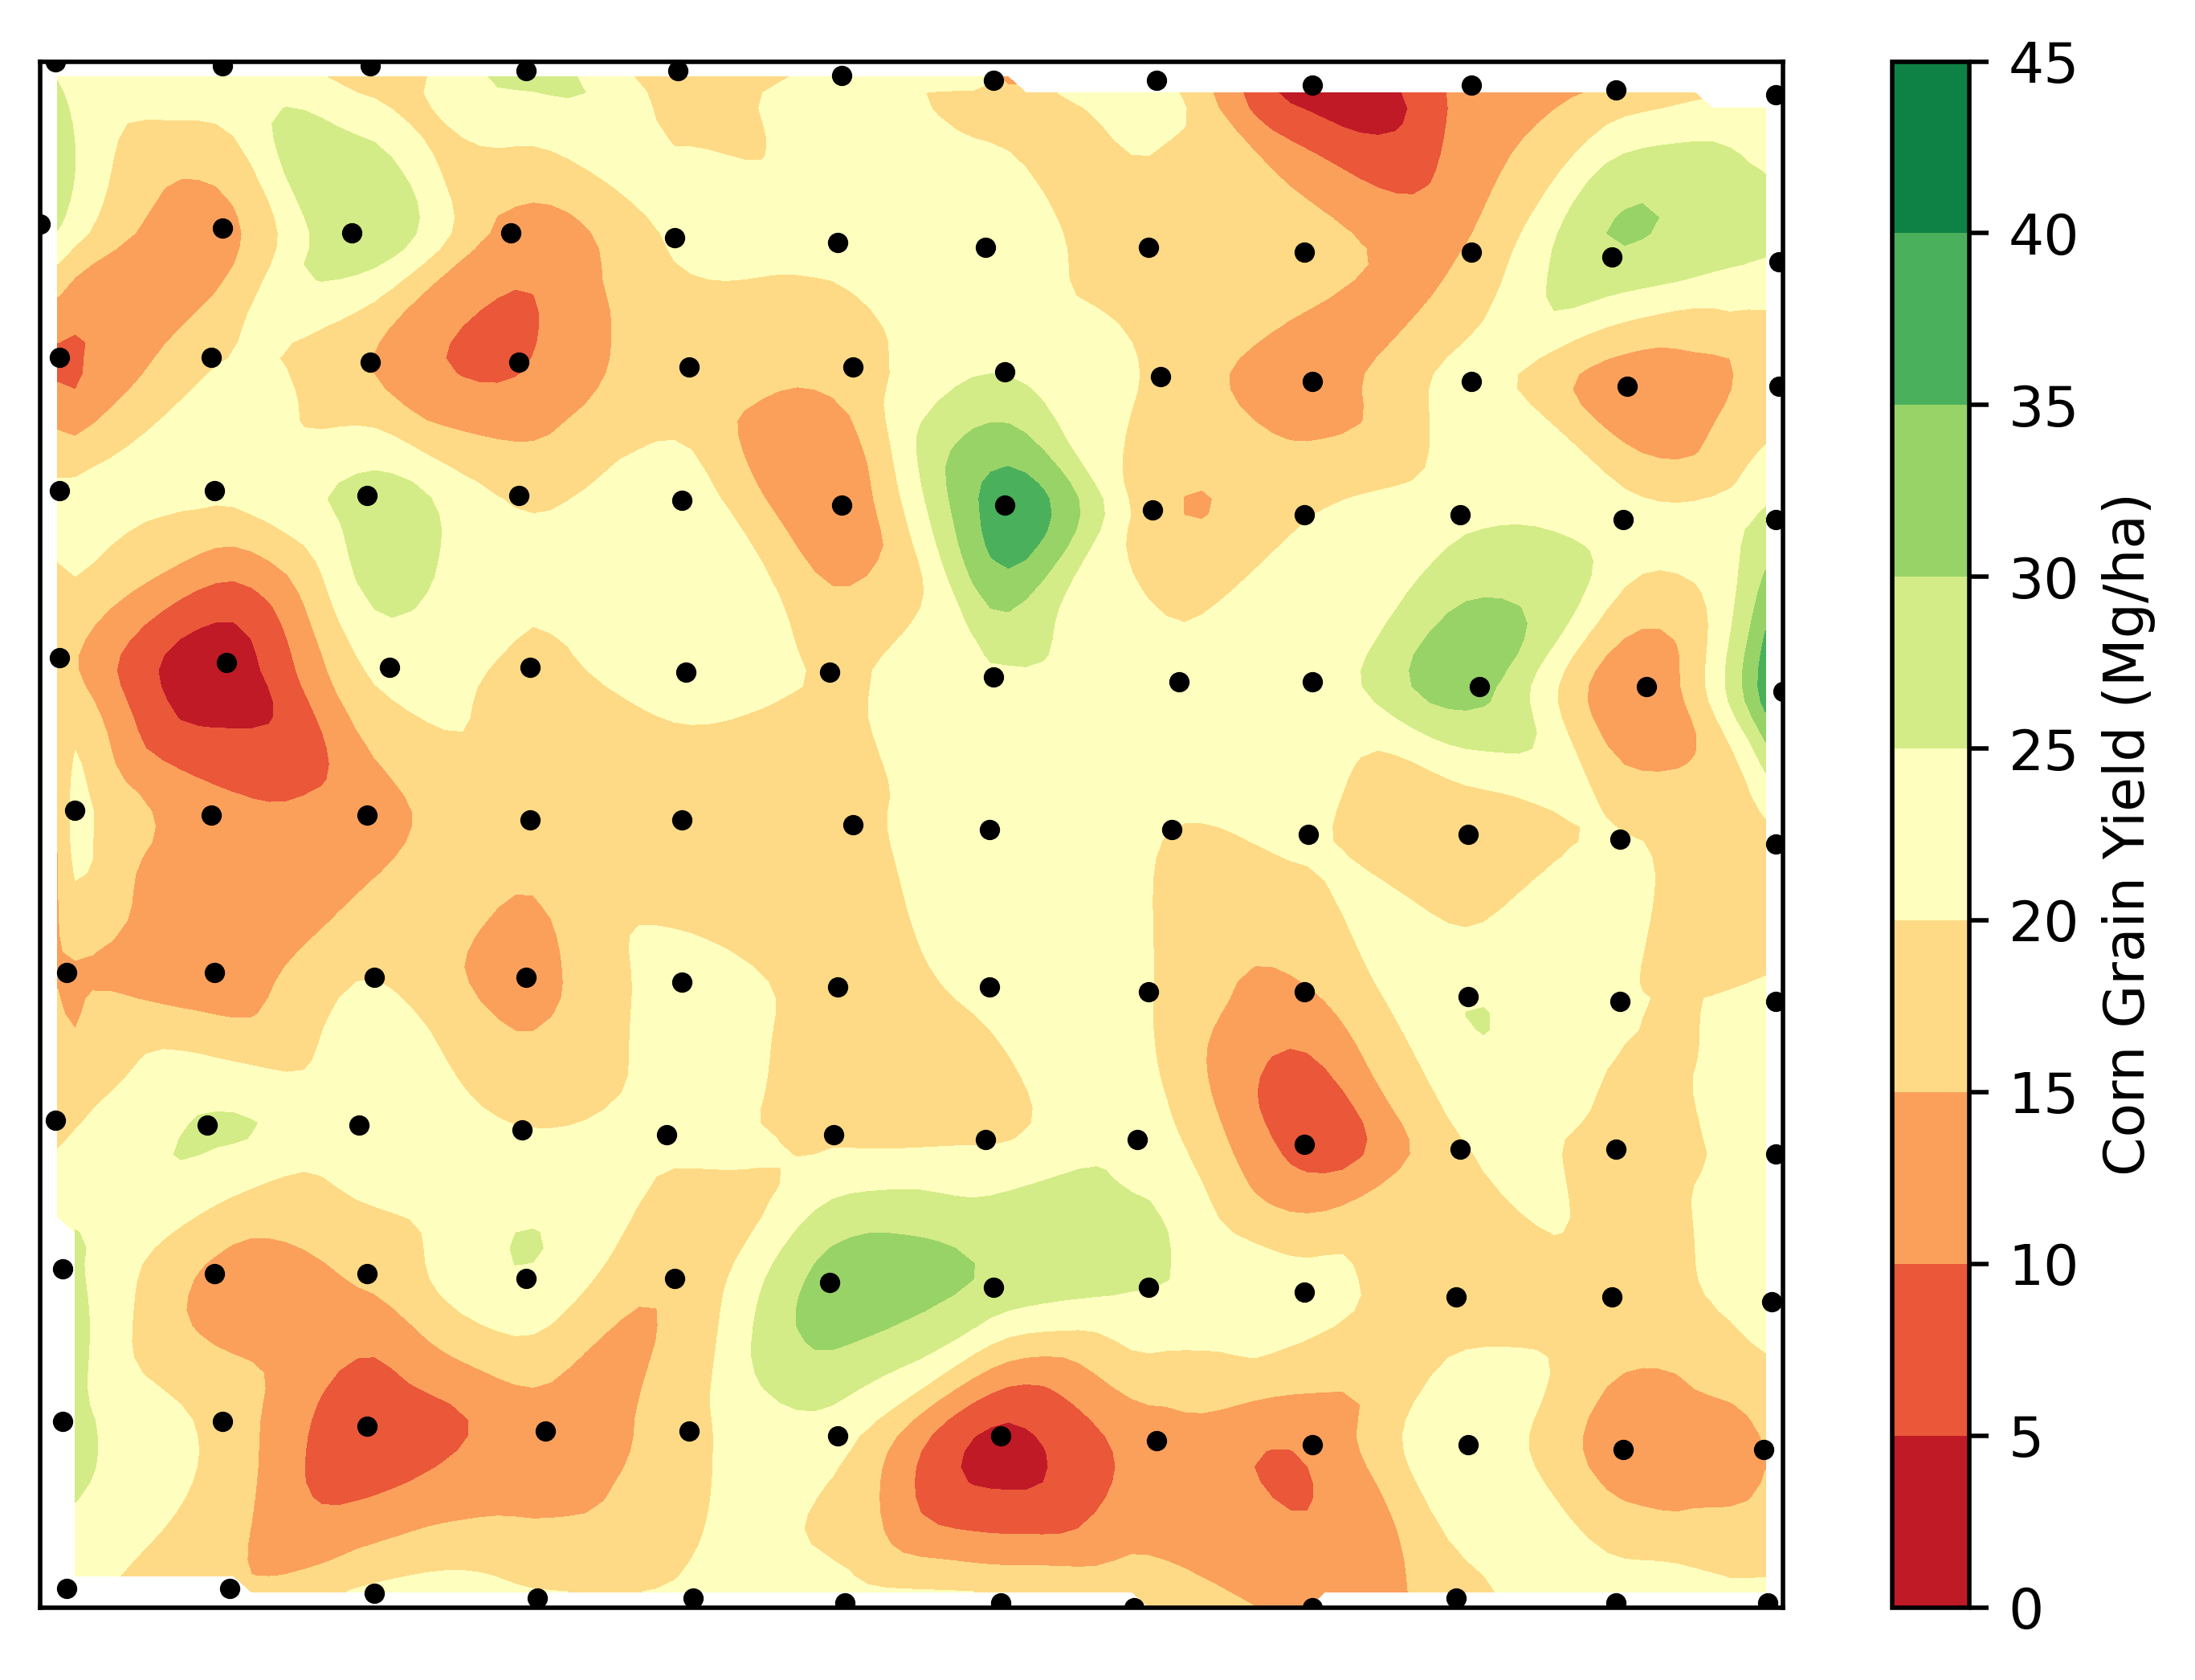

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# Extract the data
latitude = df['Latitude']
longitude = df['Longitude']
p_concentration = df['GY']

# Define grid for interpolation
grid_x, grid_y = np.mgrid[latitude.min():latitude.max():100j, longitude.min():longitude.max():100j]

# Interpolate the data to a grid
grid_z = griddata((latitude, longitude), p_concentration, (grid_x, grid_y), method='cubic')

# Define the levels for a simpler contour plot
levels = list(range(0, 50, 5))

# Create the plot with the specified levels and remove axis numbers
plt.figure(figsize=(10, 6))
contour = plt.contourf(grid_y, grid_x, grid_z, levels=levels, cmap='RdYlGn')
plt.colorbar(contour, label='Corn Grain Yield (Mg/ha)')

# Add scatter points
plt.scatter(longitude, latitude, c='black', s=7)

# axis
plt.xticks([])
plt.yticks([])

plt.show()